In [61]:
#import relevant packages for further analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
from random import randint
import sys


In [62]:
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


In [63]:
#randomizer for assigning a condition to a participant
randint(1,8)


8

In [3]:
#import raw data and delete the first two rows because of irrelevant information
d = pd.read_csv("raw-data.csv")
d = d.drop([0,1])
d


,Question 4 :_7,QID8,QID7,QID1,QID4,QID5,QID6,QID12_1,QID13_1,Question 2 :,...,Question 4 :_1,Question 4 :_2,Question 4 :_3,Question 4 :_4,Question 4 :_5,Question 4 :_6,Question 5 :_1,Question 5 :_2,Question 5 :_3,QID11_1
2,Neither agree nor disagree,1002,6,"Body,Duty,Cell,Brain,Green,Truck,Odour,Expression","Economy,Boss,Fork,Sea,Air,Street,Atmosphere,Sh...","Effort,Priest,Love,Doctor,Automobile,Machine,W...","Vest,Nail,Skin,Ceremony,Joy,Marriage,Building,...",4,5,23,...,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree,Somewhat disagree,Somewhat agree,Strongly agree,Strongly agree,4
3,Somewhat agree,1001,1,"Body,Green,Christmas,Form,Spirit","Economy,Boss,Explanation,Mother,Dress,Recognition","Sickness,Flood,Doctor,Distinction,Discovery","Coast,Season,Picture,Palace,Origin",3,4,22,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Somewhat disagree,Strongly disagree,Somewhat agree,Somewhat agree,4
4,Strongly disagree,1003,4,"Body,Cell,Green,Quantity,Background,Odour,Temp...",Elephant,"Priest,Enterprise,Doctor,Confidence,Discovery,...","Intimate,Hint,Frog,Marriage,Bird,Ability",1,4,22,...,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,5
5,Somewhat disagree,1004,8,"Body,Duty,Cell,Brain,Souvereign,Camp,Slave,Tru...","Mother,Fork,Impulse,Moment,Gratitude,Shore,Doo...","Cabin,Institute,Child,King,Enterprise,Infant,F...","Intimate,Vest,Nail,Golf,Plant,Skin,Ceremony,Ma...",6,6,22,...,Somewhat disagree,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Strongly disagree,Somewhat disagree,Somewhat agree,2
6,Strongly disagree,1005,4,"Cell,Brain,Procession,Souvereign,Quantity,Back...","Explanation,Excuse,Mother,Research,Fork,Elepha...","Effort,Priest,Child,Love,Circle,Automobile,War...","Intimate,Vest,Belief,Arrow,Nail,Skin,Tendency,...",5,5,21,...,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Somewhat disagree,6
7,Somewhat disagree,1006,5,"Green,Slave,Truck,Odour,Army,Railroad,Candidat...","Boss,Mother,Dress,Costume,Fork,Sea,Air,Gratitu...","Cabin,Priest,Child,Infant,Circle,Doctor,Anxiet...","Intimate,Nail,Frog,Plant,Palace,other:",5,5,22,...,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree,4
8,Strongly disagree,1007,3,"Cell,Brain,Green,Background,Temple,Spirit,Cand...","Mother,Recognition,Fork,Sea,Street,Length,Shor...","Child,Enterprise,Infant,Library,Discovery,Weapon","Intimate,Nail,Hint,Horse,Building,Palace",3,3,21,...,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly disagree,Somewhat agree,Strongly disagree,Somewhat agree,Somewhat agree,2
9,Somewhat agree,1008,2,"Duty,Lawn,Expression,Candidate,other :","Economy,Gift,Tribute,Pride,Mother,Fork,Sea,Imp...","Judge,Infant,Occasion,Interest,Discovery,Weapo...","Intimate,Officer,Joy,Coast,Building,other:",4,4,22,...,Somewhat disagree,Neither agree nor disagree,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat disagree,Strongly disagree,Somewhat agree,Strongly agree,3
10,Somewhat disagree,1010,3,"Truck,Oats,Seat,Spirit,other :","Economy,Boss,Sunset,Gratitude,other:","Cabin,King,Love,Occasion,Warmth,Confidence,Dis...","Intimate,Vest,Idea,Frog,Marriage,other:",3,3,23,...,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,4
11,Somewhat agree,1011,1,"Body,Duty,Cell,Brain,Souvereign,Slave,Truck,Od...","Economy,Boss,Explanation,Gift,Mother,Dress,Cos...","Cabin,Institute,Judge,Priest,Child,Enterprise,...","Intimate,Vest,Idea,Nail,Frog,Golf,Plant,Ceremo...",5,6,22,...,St

In [4]:
#rename columns of raw data for convenience 
column_names = ["q4_7", "ID", "condition","w1", "w2", "w3", "w4", "p3", "p4", "age", "native", "w1_other", "w3_other", "w4_other", "p1", "gender", "w2_other", "q4_1", "q4_2", "q4_3", "q4_4", "q4_5", "q4_6", "q5_1", "q5_2", "q5_3", "p2"]
d.columns = column_names
d

,q4_7,ID,condition,w1,w2,w3,w4,p3,p4,age,...,q4_1,q4_2,q4_3,q4_4,q4_5,q4_6,q5_1,q5_2,q5_3,p2
2,Neither agree nor disagree,1002,6,"Body,Duty,Cell,Brain,Green,Truck,Odour,Expression","Economy,Boss,Fork,Sea,Air,Street,Atmosphere,Sh...","Effort,Priest,Love,Doctor,Automobile,Machine,W...","Vest,Nail,Skin,Ceremony,Joy,Marriage,Building,...",4,5,23,...,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree,Somewhat disagree,Somewhat agree,Strongly agree,Strongly agree,4
3,Somewhat agree,1001,1,"Body,Green,Christmas,Form,Spirit","Economy,Boss,Explanation,Mother,Dress,Recognition","Sickness,Flood,Doctor,Distinction,Discovery","Coast,Season,Picture,Palace,Origin",3,4,22,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Somewhat disagree,Strongly disagree,Somewhat agree,Somewhat agree,4
4,Strongly disagree,1003,4,"Body,Cell,Green,Quantity,Background,Odour,Temp...",Elephant,"Priest,Enterprise,Doctor,Confidence,Discovery,...","Intimate,Hint,Frog,Marriage,Bird,Ability",1,4,22,...,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,5
5,Somewhat disagree,1004,8,"Body,Duty,Cell,Brain,Souvereign,Camp,Slave,Tru...","Mother,Fork,Impulse,Moment,Gratitude,Shore,Doo...","Cabin,Institute,Child,King,Enterprise,Infant,F...","Intimate,Vest,Nail,Golf,Plant,Skin,Ceremony,Ma...",6,6,22,...,Somewhat disagree,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Strongly disagree,Somewhat disagree,Somewhat agree,2
6,Strongly disagree,1005,4,"Cell,Brain,Procession,Souvereign,Quantity,Back...","Explanation,Excuse,Mother,Research,Fork,Elepha...","Effort,Priest,Child,Love,Circle,Automobile,War...","Intimate,Vest,Belief,Arrow,Nail,Skin,Tendency,...",5,5,21,...,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Somewhat disagree,6
7,Somewhat disagree,1006,5,"Green,Slave,Truck,Odour,Army,Railroad,Candidat...","Boss,Mother,Dress,Costume,Fork,Sea,Air,Gratitu...","Cabin,Priest,Child,Infant,Circle,Doctor,Anxiet...","Intimate,Nail,Frog,Plant,Palace,other:",5,5,22,...,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree,4
8,Strongly disagree,1007,3,"Cell,Brain,Green,Background,Temple,Spirit,Cand...","Mother,Recognition,Fork,Sea,Street,Length,Shor...","Child,Enterprise,Infant,Library,Discovery,Weapon","Intimate,Nail,Hint,Horse,Building,Palace",3,3,21,...,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly disagree,Somewhat agree,Strongly disagree,Somewhat agree,Somewhat agree,2
9,Somewhat agree,1008,2,"Duty,Lawn,Expression,Candidate,other :","Economy,Gift,Tribute,Pride,Mother,Fork,Sea,Imp...","Judge,Infant,Occasion,Interest,Discovery,Weapo...","Intimate,Officer,Joy,Coast,Building,other:",4,4,22,...,Somewhat disagree,Neither agree nor disagree,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat disagree,Strongly disagree,Somewhat agree,Strongly agree,3
10,Somewhat disagree,1010,3,"Truck,Oats,Seat,Spirit,other :","Economy,Boss,Sunset,Gratitude,other:","Cabin,King,Love,Occasion,Warmth,Confidence,Dis...","Intimate,Vest,Idea,Frog,Marriage,other:",3,3,23,...,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,4
11,Somewhat agree,1011,1,"Body,Duty,Cell,Brain,Souvereign,Slave,Truck,Od...","Economy,Boss,Explanation,Gift,Mother,Dress,Cos...","Cabin,Institute,Judge,Priest,Child,Enterprise,...","Intimate,Vest,Idea,Nail,Frog,Golf,Plant,Ceremo...",5,6,22,...,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree

In [5]:
#create seperate dataframe in order to analyse the wordlists counts and the other attributes for the RQs
data = pd.DataFrame()
data["w1"] = d["w1"]
data["w2"] = d["w2"]
data["w3"] = d["w3"]
data["w4"] = d["w4"]
data["age"] = d["age"]
data["gender"] = d["gender"]
data["q4_3"] = d["q4_3"]
data["q4_4"] = d["q4_4"]
data

,w1,w2,w3,w4,age,gender,q4_3,q4_4
2,"Body,Duty,Cell,Brain,Green,Truck,Odour,Expression","Economy,Boss,Fork,Sea,Air,Street,Atmosphere,Sh...","Effort,Priest,Love,Doctor,Automobile,Machine,W...","Vest,Nail,Skin,Ceremony,Joy,Marriage,Building,...",23,Female,Somewhat agree,Neither agree nor disagree
3,"Body,Green,Christmas,Form,Spirit","Economy,Boss,Explanation,Mother,Dress,Recognition","Sickness,Flood,Doctor,Distinction,Discovery","Coast,Season,Picture,Palace,Origin",22,Female,Neither agree nor disagree,Neither agree nor disagree
4,"Body,Cell,Green,Quantity,Background,Odour,Temp...",Elephant,"Priest,Enterprise,Doctor,Confidence,Discovery,...","Intimate,Hint,Frog,Marriage,Bird,Ability",22,Female,Strongly agree,Strongly agree
5,"Body,Duty,Cell,Brain,Souvereign,Camp,Slave,Tru...","Mother,Fork,Impulse,Moment,Gratitude,Shore,Doo...","Cabin,Institute,Child,King,Enterprise,Infant,F...","Intimate,Vest,Nail,Golf,Plant,Skin,Ceremony,Ma...",22,Female,Neither agree nor disagree,Neither agree nor disagree
6,"Cell,Brain,Procession,Souvereign,Quantity,Back...","Explanation,Excuse,Mother,Research,Fork,Elepha...","Effort,Priest,Child,Love,Circle,Automobile,War...","Intimate,Vest,Belief,Arrow,Nail,Skin,Tendency,...",21,Male,Somewhat agree,Somewhat agree
7,"Green,Slave,Truck,Odour,Army,Railroad,Candidat...","Boss,Mother,Dress,Costume,Fork,Sea,Air,Gratitu...","Cabin,Priest,Child,Infant,Circle,Doctor,Anxiet...","Intimate,Nail,Frog,Plant,Palace,other:",22,Female,Neither agree nor disagree,Neither agree nor disagree
8,"Cell,Brain,Green,Background,Temple,Spirit,Cand...","Mother,Recognition,Fork,Sea,Street,Length,Shor...","Child,Enterprise,Infant,Library,Discovery,Weapon","Intimate,Nail,Hint,Horse,Building,Palace",21,Female,Somewhat agree,Somewhat agree
9,"Duty,Lawn,Expression,Candidate,other :","Economy,Gift,Tribute,Pride,Mother,Fork,Sea,Imp...","Judge,Infant,Occasion,Interest,Discovery,Weapo...","Intimate,Officer,Joy,Coast,Building,other:",22,Female,Somewhat disagree,Somewhat agree
10,"Truck,Oats,Seat,Spirit,other :","Economy,Boss,Sunset,Gratitude,other:","Cabin,King,Love,Occasion,Warmth,Confidence,Dis...","Intimate,Vest,Idea,Frog,Marriage,other:",23,Female,Neither agree nor disagree,Neither agree nor disagree
11,"Body,Duty,Cell,Brain,Souvereign,Slave,Truck,Od...","Economy,Boss,Explanation,Gift,Mother,Dress,Cos...","Cabin,Institute,Judge,Priest,Child,Enterprise,...","Intimate,Vest,Idea,Nail,Frog,Golf,Plant,Ceremo...",22,Male,Strongly agree,Strongly agree


In [6]:
#for each participants look how many words they recalled in each wordlist

#wordlist 1 
#create empty list to store the amount of recalled words 
val = []

#loop through the first wordlist, and analyse each participants' answer seperately 
for cell in data["w1"]:
    c = cell.split(",")  #to access each word individually, the words are splitted by commas
    print(c)
    if 'other :' in c:   #if participants recalled other words, than in the wordlist, the "other : "box was checked. This influences the amount of all words. So if ''other'' is found, the total of the correct recalled words will be total - 1 
        l = len(c)-1
        val.append(l)   # the total number of correct recalled words per participant is added to the list
        print("correct recalled words is : ", l)
    else:
        l = len(c)
        val.append(l) # if other is not found, the total number of correct recalled words per participant is immediately added to the list
        print("correct recalled words is : ", l)
print(val)

data.insert(loc=1, column='w1_count', value=val)   #the total number of recalled word per participant is added in a new column, next to the corresponding wordlist

#count wordlist 2 
#create empty list to store the amount of recalled words 
val2 = []

#loop through the second wordlist, and analyse each participants' answer seperately 
for cell in data["w2"]:
    c = cell.split(",") #to access each word individually, the words are splitted by commas
    print(c)
    if 'other:' in c:    #if participants recalled other words, than in the wordlist, the "other : "box was checked. This influences the amount of all words. So if ''other'' is found, the total of the correct recalled words will be total - 1
        l = len(c)-1
        val2.append(l)   # the total number of correct recalled words per participant is added to the list
        print("correct recalled words is : ", l)
    else:
        l = len(c)
        val2.append(l)    # if other is not found, the total number of correct recalled words per participant is immediately added to the list
        print("correct recalled words is : ", l)
print(val2)
data.insert(loc=3, column='w2_count', value=val2)  #the total number of recalled word per participant is added in a new column, next to the corresponding wordlist


#count wordlist 3 
#create empty list to store the amount of recalled words 
val3 = []

#loop through the third wordlist, and analyse each participants' answer seperately 
for cell in data["w3"]:
    c = cell.split(",")  #to access each word individually, the words are splitted by commas
    print(c)
    if 'other:' in c:   # if participants recalled other words, than in the wordlist, the "other : "box was checked. This influences the amount of all words. So if ''other'' is found, the total of the correct recalled words will be total - 1
        l = len(c)-1
        val3.append(l)     # the total number of correct recalled words per participant is added to the list
        print("correct recalled words is : ", l)
    else:
        l = len(c)
        val3.append(l)     # if other is not found, the total number of correct recalled words per participant is immediately added to the list
        print("correct recalled words is : ", l)
print(val3)
data.insert(loc=5, column='w3_count', value=val3)    #the total number of recalled word per participant is added in a new column, next to the corresponding wordlist

#count wordlist 4
#create empty list to store the amount of recalled words 
val4 = []

#loop through the fourth wordlist, and analyse each participants' answer seperately 
for cell in data["w4"]:
    c = cell.split(",")    #to access each word individually, the words are splitted by commas
    print(c)
    if 'other:' in c:      # if participants recalled other words, than in the wordlist, the "other : "box was checked. This influences the amount of all words. So if ''other'' is found, the total of the correct recalled words will be total - 1
        l = len(c)-1
        val4.append(l)          # the total number of correct recalled words per participant is added to the list
        print("correct recalled words is : ", l)
    else:
        l = len(c)
        val4.append(l)           # if other is not found, the total number of correct recalled words per participant is immediately added to the list
        print("correct recalled words is : ", l)
print(val4)
data.insert(loc=7, column='w4_count', value=val4)        #the total number of recalled word per participant is added in a new column, next to the corresponding wordlist



['Body', 'Duty', 'Cell', 'Brain', 'Green', 'Truck', 'Odour', 'Expression']
correct recalled words is :  8
['Body', 'Green', 'Christmas', 'Form', 'Spirit']
correct recalled words is :  5
['Body', 'Cell', 'Green', 'Quantity', 'Background', 'Odour', 'Temple', 'Bowl', 'Candidate', 'other :']
correct recalled words is :  9
['Body', 'Duty', 'Cell', 'Brain', 'Souvereign', 'Camp', 'Slave', 'Truck', 'Army', 'Seat', 'Lawn', 'other :']
correct recalled words is :  11
['Cell', 'Brain', 'Procession', 'Souvereign', 'Quantity', 'Background', 'Odour', 'Chance', 'Christmas', 'Lawn', 'Expression', 'Bowl', 'other :']
correct recalled words is :  12
['Green', 'Slave', 'Truck', 'Odour', 'Army', 'Railroad', 'Candidate', 'other :']
correct recalled words is :  7
['Cell', 'Brain', 'Green', 'Background', 'Temple', 'Spirit', 'Candidate', 'other :']
correct recalled words is :  7
['Duty', 'Lawn', 'Expression', 'Candidate', 'other :']
correct recalled words is :  4
['Truck', 'Oats', 'Seat', 'Spirit', 'other :']
c

In [7]:
#reset index, since it starts at 2 
data.reset_index(drop=True, inplace=True)
data.index += 1
data

,w1,w1_count,w2,w2_count,w3,w3_count,w4,w4_count,age,gender,q4_3,q4_4
1,"Body,Duty,Cell,Brain,Green,Truck,Odour,Expression",8,"Economy,Boss,Fork,Sea,Air,Street,Atmosphere,Sh...",9,"Effort,Priest,Love,Doctor,Automobile,Machine,W...",9,"Vest,Nail,Skin,Ceremony,Joy,Marriage,Building,...",8,23,Female,Somewhat agree,Neither agree nor disagree
2,"Body,Green,Christmas,Form,Spirit",5,"Economy,Boss,Explanation,Mother,Dress,Recognition",6,"Sickness,Flood,Doctor,Distinction,Discovery",5,"Coast,Season,Picture,Palace,Origin",5,22,Female,Neither agree nor disagree,Neither agree nor disagree
3,"Body,Cell,Green,Quantity,Background,Odour,Temp...",9,Elephant,1,"Priest,Enterprise,Doctor,Confidence,Discovery,...",5,"Intimate,Hint,Frog,Marriage,Bird,Ability",6,22,Female,Strongly agree,Strongly agree
4,"Body,Duty,Cell,Brain,Souvereign,Camp,Slave,Tru...",11,"Mother,Fork,Impulse,Moment,Gratitude,Shore,Doo...",7,"Cabin,Institute,Child,King,Enterprise,Infant,F...",12,"Intimate,Vest,Nail,Golf,Plant,Skin,Ceremony,Ma...",14,22,Female,Neither agree nor disagree,Neither agree nor disagree
5,"Cell,Brain,Procession,Souvereign,Quantity,Back...",12,"Explanation,Excuse,Mother,Research,Fork,Elepha...",11,"Effort,Priest,Child,Love,Circle,Automobile,War...",9,"Intimate,Vest,Belief,Arrow,Nail,Skin,Tendency,...",10,21,Male,Somewhat agree,Somewhat agree
6,"Green,Slave,Truck,Odour,Army,Railroad,Candidat...",7,"Boss,Mother,Dress,Costume,Fork,Sea,Air,Gratitu...",9,"Cabin,Priest,Child,Infant,Circle,Doctor,Anxiet...",7,"Intimate,Nail,Frog,Plant,Palace,other:",5,22,Female,Neither agree nor disagree,Neither agree nor disagree
7,"Cell,Brain,Green,Background,Temple,Spirit,Cand...",7,"Mother,Recognition,Fork,Sea,Street,Length,Shor...",8,"Child,Enterprise,Infant,Library,Discovery,Weapon",6,"Intimate,Nail,Hint,Horse,Building,Palace",6,21,Female,Somewhat agree,Somewhat agree
8,"Duty,Lawn,Expression,Candidate,other :",4,"Economy,Gift,Tribute,Pride,Mother,Fork,Sea,Imp...",11,"Judge,Infant,Occasion,Interest,Discovery,Weapo...",6,"Intimate,Officer,Joy,Coast,Building,other:",5,22,Female,Somewhat disagree,Somewhat agree
9,"Truck,Oats,Seat,Spirit,other :",4,"Economy,Boss,Sunset,Gratitude,other:",4,"Cabin,King,Love,Occasion,Warmth,Confidence,Dis...",7,"Intimate,Vest,Idea,Frog,Marriage,other:",5,23,Female,Neither agree nor disagree,Neither agree nor disagree
10,"Body,Duty,Cell,Brain,Souvereign,Slave,Truck,Od...",13,"Economy,Boss,Explanation,Gift,Mother,Dress,Cos...",17,"Cabin,Institute,Judge,Priest,Child,Enterprise,...",18,"Intimate,Vest,Idea,Nail,Frog,Golf,Plant,Ceremo...",14,22,Male,Strongly agree,Strongly agree


In [8]:
#define wordlists
wordlist1 = ["body", "duty", "cell", "brain", "procession", "souvereign", "camp", "green", "bloom", "slave", "truck",
             "quantity", "background", "odour", "temple", "oats", "exhaust", "army", "railroad", "chance", "christmas",
             "seat", "lawn", "virtue", "style", "expression", "form", "bowl", "spirit", "candidate"]
w1 = []
wordlist2 = ["economy", "boss", "explanation", "gift", "excuse","tribute", "pride", "mother", "dress", "costume",
             "recognition", "research", "fork", "sea", "hope", "impulse", "air", "street", "speaker", "length",
             "elephant", "mood", "moment", "sunset", "atmosphere", "board", "gratitude", "shore", "door", "happiness"]

w2 = []
wordlist3 = ["cabin", "institute", "judge", "effort", "priest", "sickness", "child", "king", "enterprise", "infant",
             "love", "flood", "circle", "doctor", "honour", "anxiety", "automobile", "flag", "paper", "library", "occasion",
             "garden", "interest", "machine", "warmth", "string", "distinction", "confidence", "discovery", "weapon"]

w3 = []
wordlist4 = ["intimate", "vest", "belief", "idea", "arrow", "nail", "hint", "officer", "frog", "golf", "plant", "skin",
             "ceremony", "joy", "marriage", "horse", "tendency", "steamer", "bird", "ability", "method", "coast", "building",
             "season", "picture", "hall", "palace", "church", "product", "origin"]
w4 = [] 

#capatilze words, since that is how the raw data looks like
for word in wordlist1:
    w1.append(word.capitalize())
for word in wordlist2:
    w2.append(word.capitalize())
for word in wordlist3:
    w3.append(word.capitalize())
for word in wordlist4:
    w4.append(word.capitalize())
w1.append("other :")
w2.append("other:")
w3.append("other:")
w4.append("other:")



In [ ]:
# In the following pieces of code, a dictionary is created to store the frequencies of the recalled words for each wordlist


# Initialize a dictionary to store the frequencies w1
word_freq =  {}
for word in w1:
    word_freq[word] = 0     # loop throough the wordlist, and assign each word with a  count of zero in the dictionary
    
# make a list to store the answers 
answers = [] 
for cell in data["w1"]:    #loop through each answer of a participant
    c = cell.split(",")    #split the words, through  commas -> single words 
    answers.append(c)      #store every single word in a list

for answer in answers:     #go through the list of all recalled words 
    for word in answer:     # check single word in answerlist
        if word in word_freq:    #check if the word is already in the dictionary
            word_freq[word] +=1  #if yes, increase the frequency count with one
        else:
            word_freq[word] =1   #if not, set the frequency count to one

#print the words in the wordlist, and the corresponding frequencies from all participants 
for word, freq in word_freq.items():
    print(f"{word}: {freq}")
    
    
# Initialize a dictionary to store the frequencies w2
word_freq2 =  {}
for word in w2:     # loop throough the wordlist, and assign each word with a  count of zero in the dictionary
    word_freq2[word] = 0  
    
#define a list to store the answers
answers = [] 
for cell in data["w2"]:       #loop through each answer of a participant
    c = cell.split(",")         #split the words, through  commas -> single words 
    answers.append(c)      #store every single word in a list
    
for answer in answers:     #go through the list of all recalled words 
    for word in answer:         # check single word in answerlist
        if word in word_freq2:        #check if the word is already in the dictionary
            word_freq2[word] +=1   #if yes, increase the frequency count with one
        else:
            word_freq2[word] =1     #if not, set the frequency count to one
        
#print the words in the wordlist, and the corresponding frequencies from all participants
for word, freq in word_freq2.items():
    print(f"{word}: {freq}")

# Initialize a dictionary to store the frequencies w3
#the exact same steps as in the previously two mentioned piece of codeblocks
word_freq3 =  {}
for word in w3:
    word_freq3[word] = 0 

answers = [] 
for cell in data["w3"]:
    c = cell.split(",")
    answers.append(c)
for answer in answers:
    for word in answer:
        if word in word_freq3:
            word_freq3[word] +=1
        else:
            word_freq3[word] =1
    

# Print the frequencies
for word, freq in word_freq3.items():
    print(f"{word}: {freq}")
    

# Initialize a dictionary to store the frequencies w4
#the exact same steps as in the previously  mentioned piece of codeblocks
word_freq4 =  {}
for word in w4:
    word_freq4[word] = 0 
    answers = [] 
for cell in data["w4"]:
    c = cell.split(",")
    answers.append(c)
# print(answers)
for answer in answers:
    for word in answer:
        if word in word_freq4:
            word_freq4[word] +=1
        else:
            word_freq4[word] =1
    

# Print the frequencies
for word, freq in word_freq4.items():
    print(f"{word}: {freq}")

Body: 38
Duty: 10
Cell: 20
Brain: 21
Procession: 6
Souvereign: 10
Camp: 7
Green: 27
Bloom: 8
Slave: 18
Truck: 12
Quantity: 8
Background: 14
Odour: 17
Temple: 11
Oats: 10
Exhaust: 6
Army: 14
Railroad: 2
Chance: 2
Christmas: 13
Seat: 10
Lawn: 9
Virtue: 9
Style: 5
Expression: 16
Form: 8
Bowl: 13
Spirit: 15
Candidate: 23
other :: 32
Economy: 35
Boss: 33
Explanation: 11
Gift: 9
Excuse: 3
Tribute: 8
Pride: 9
Mother: 38
Dress: 21
Costume: 12
Recognition: 7
Research: 5
Fork: 15
Sea: 24
Hope: 5
Impulse: 3
Air: 15
Street: 10
Speaker: 3
Length: 3
Elephant: 13
Mood: 4
Moment: 1
Sunset: 14
Atmosphere: 15
Board: 8
Gratitude: 13
Shore: 26
Door: 16
Happiness: 19
other:: 28
Cabin: 25
Institute: 23
Judge: 22
Effort: 6
Priest: 21
Sickness: 7
Child: 27
King: 14
Enterprise: 10
Infant: 24
Love: 24
Flood: 10
Circle: 12
Doctor: 21
Honour: 10
Anxiety: 18
Automobile: 10
Flag: 7
Paper: 11
Library: 9
Occasion: 7
Garden: 7
Interest: 4
Machine: 9
Warmth: 12
String: 6
Distinction: 7
Confidence: 15
Discovery: 16
Weap

In [10]:
#calculate the mean of recalled words in each wordlist, with the corresponding standard deviation
mean_w1 = (data["w1_count"].mean())
mean_w2 = (data["w2_count"].mean())
mean_w3 = (data["w3_count"].mean())
mean_w4 = (data["w4_count"].mean())
s1 = (data["w1_count"].std())
s2 = (data["w2_count"].std())
s3 = (data["w3_count"].std())
s4 = (data["w4_count"].std())



print("The mean of recalled words in wordlist 1 is : ", mean_w1, "and the standard deviation is :", s1)
print("The mean of recalled words in wordlist 2 is : ", mean_w2, "and the standard deviation is :",s2)
print("The mean of recalled words in wordlist 3 is : ", mean_w3, "and the standard deviation is :",s3)
print("The mean of recalled words in wordlist 4 is : ", mean_w4, "and the standard deviation is :",s4)

The mean of recalled words in wordlist 1 is :  7.795918367346939 and the standard deviation is : 2.6059194781363852
The mean of recalled words in wordlist 2 is :  8.122448979591837 and the standard deviation is : 3.1400149486190365
The mean of recalled words in wordlist 3 is :  8.571428571428571 and the standard deviation is : 3.5000000000000004
The mean of recalled words in wordlist 4 is :  8.0 and the standard deviation is : 3.278719262151


In [11]:
#obtain some descriptives about the gender of the participants 
d['age'] = d['age'].astype(int)
d["age"].describe()

count    49.000000
mean     22.224490
std       3.001842
min      18.000000
25%      20.000000
50%      22.000000
75%      23.000000
max      32.000000
Name: age, dtype: float64

<h1>Problem statement 

In [12]:
#merge the two wordslist that had the VR condition together, same for the two non-VR wordlists
data_VR = pd.concat([(data["w2_count"]),(data["w4_count"])], axis = 0 )
data_audio = pd.concat([(data["w1_count"]),(data["w3_count"])], axis = 0)

In [13]:
#print mean and std of VR and audio data
print("The mean of correct recalled words for the VR condition is :", data_VR.mean(), "and the STD is : ", data_VR.std())
print("The mean of correct recalled words for the non-VR condition is :", data_audio.mean(), "and the STD is : ", data_audio.std())

The mean of correct recalled words for the VR condition is : 8.061224489795919 and the STD is :  3.194119359881103
The mean of correct recalled words for the non-VR condition is : 8.183673469387756 and the STD is :  3.0942145507532275


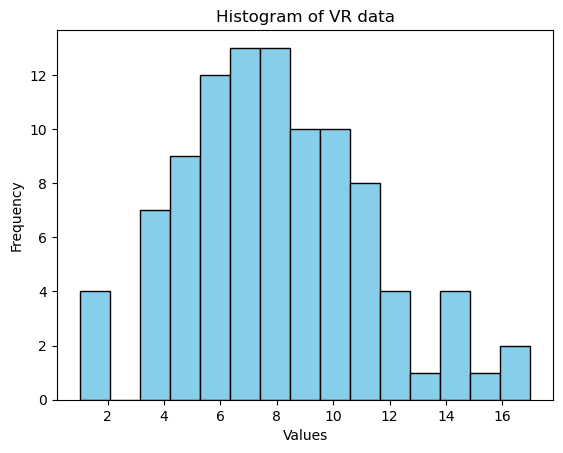

 VR Shapiro test :  ShapiroResult(statistic=0.9760002493858337, pvalue=0.06969793140888214)


In [57]:
#check if the VR data sample is normally distributed, in order to check the normality assumption

#if p-value > 0.05, data is normally distributed
# Plot the histogram
plt.hist(data_VR, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of VR data')

# Show the plot
plt.show()
print(" VR Shapiro test : ", stats.shapiro(data_VR))
#p-value > 0.05, VR data is NORMAL


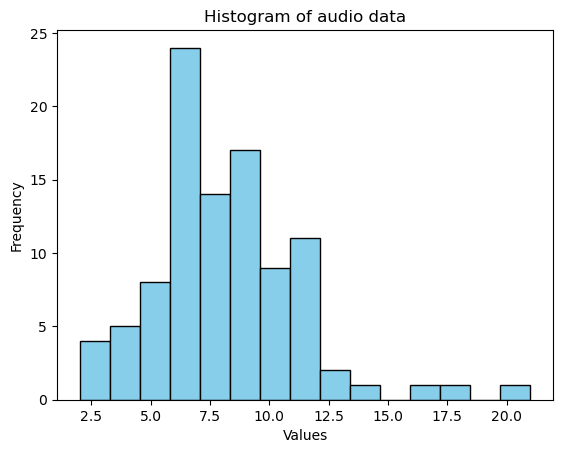

 Audio Shapiro test :  ShapiroResult(statistic=0.9362385272979736, pvalue=0.0001346180506516248)


In [56]:
#check if the audio data sample is normally distributed, in order to check the normality assumption

#if p-value > 0.05, data is normally distributed
# Plot the histogram
plt.hist(data_audio, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of audio data')

# Show the plot
plt.show()
print(" Audio Shapiro test : ", stats.shapiro(data_audio))
#p-value < 0.05, audio data is NOT NORMAL


In [16]:
#homogenity of variances test between VR and audio
stats.levene(data_VR, data_audio)
#p-value > 0.05, homogenity in variance 

LeveneResult(statistic=0.4819396830128672, pvalue=0.4883755132907628)

In [17]:
#mann whitney u between VR and audio
stats.mannwhitneyu(data_VR, data_audio)

MannwhitneyuResult(statistic=4719.0, pvalue=0.8344751677942442)

<h1>RQ1

In [18]:
#make dataframe for comparison female vs male voice
data_female_voice = pd.concat([data["w3_count"], data["w4_count"]], axis = 0)
data_male_voice = pd.concat([data["w1_count"], data["w2_count"]], axis = 0)


In [19]:
#print mean and std of female and male voice 
print("The mean of correct recalled words when exposed to a female voice :", data_female_voice.mean(), "and the STD is : ", data_female_voice.std())
print("The mean of correct recalled words when exposed to a male voice :", data_male_voice.mean(), "and the STD is : ", data_male_voice.std())

The mean of correct recalled words when exposed to a female voice : 8.285714285714286 and the STD is :  3.3858407413481806
The mean of correct recalled words when exposed to a male voice : 7.959183673469388 and the STD is :  2.875127491021504


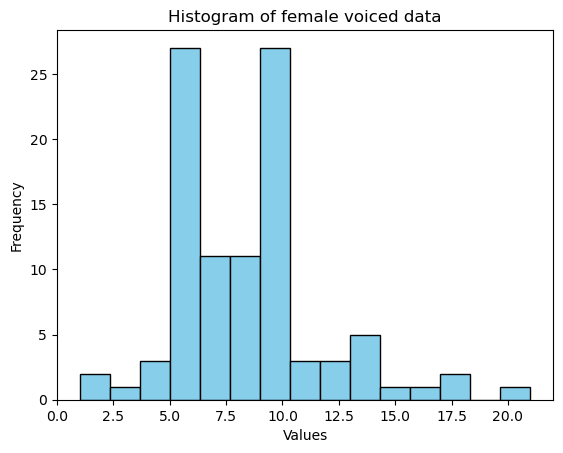

 female Shapiro test :  ShapiroResult(statistic=0.931980550289154, pvalue=7.639835530426353e-05)


In [55]:
# Plot the histogram
plt.hist(data_female_voice, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of female voiced data')

# Show the plot
plt.show()

print(" female Shapiro test : ", stats.shapiro(data_female_voice))
#female data is NOT NORMAL

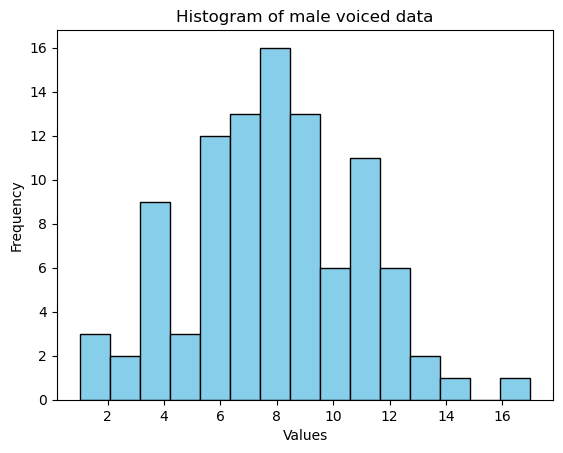

male shapiro : ShapiroResult(statistic=0.9825273752212524, pvalue=0.219259113073349)


In [54]:
#plot the histogram

plt.hist(data_male_voice, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of male voiced data')

# Show the plot
plt.show()
print("male shapiro :", stats.shapiro(data_male_voice))

# male voice data is NORMAL 

In [22]:
#variance test for female and male data
stats.levene(data_female_voice, data_male_voice)
#p-value > 0.05, homogenity in variance 

LeveneResult(statistic=0.9468599033816416, pvalue=0.3317315793348955)

In [23]:
#mann whitney u between female and male data
stats.mannwhitneyu(data_female_voice, data_male_voice)

MannwhitneyuResult(statistic=4845.5, pvalue=0.9132696286127786)

<h1>RQ2

In [24]:
#compare recall performance between each of the four conditions
data_male_audio = data["w1_count"]
data_male_VR = data["w2_count"]
data_female_audio = data["w3_count"]
data_female_VR = data["w4_count"]

In [25]:
#calculate the mean of recalled words in each wordlist, with the corresponding standard deviation
mean_w1 = (data_male_audio.mean())
mean_w2 = (data_male_VR.mean())
mean_w3 = (data_female_audio.mean())
mean_w4 = (data_female_VR.mean())
s1 = (data_male_audio.std())
s2 = (data_male_VR.std())
s3 = (data_female_audio.std())
s4 = (data_female_VR.std())



print("The mean of recalled words for male audio  is : ", mean_w1, "and the standard deviation is :", s1)
print("The mean of recalled words for male VR is : ", mean_w2, "and the standard deviation is :",s2)
print("The mean of recalled words for female audio is : ", mean_w3, "and the standard deviation is :",s3)
print("The mean of recalled words for female VR is : ", mean_w4, "and the standard deviation is :",s4)

The mean of recalled words for male audio  is :  7.795918367346939 and the standard deviation is : 2.6059194781363852
The mean of recalled words for male VR is :  8.122448979591837 and the standard deviation is : 3.1400149486190365
The mean of recalled words for female audio is :  8.571428571428571 and the standard deviation is : 3.5000000000000004
The mean of recalled words for female VR is :  8.0 and the standard deviation is : 3.278719262151


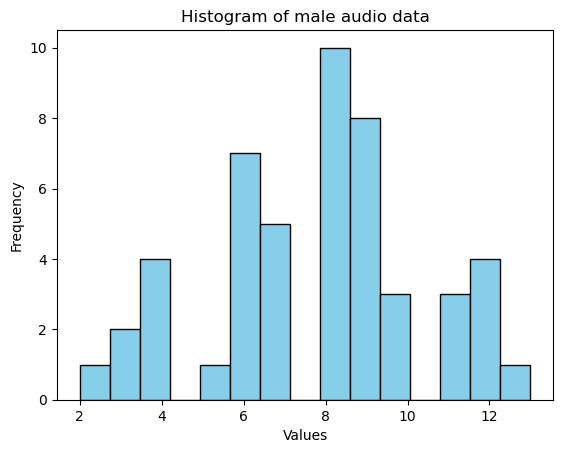

male audio shapiro : ShapiroResult(statistic=0.9719116687774658, pvalue=0.2880450487136841)


In [53]:
#check normality assumption for male audio

#plot histogram
plt.hist(data_male_audio, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of male audio data')

# Show the plot
plt.show()

print("male audio shapiro :", stats.shapiro(data_male_audio))

# normal 

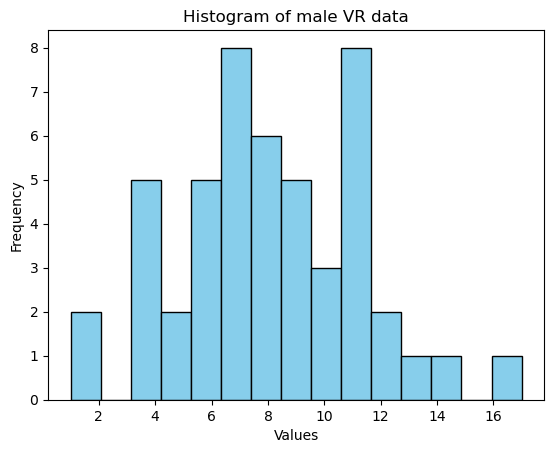

male VR shapiro : ShapiroResult(statistic=0.9801343679428101, pvalue=0.5709068775177002)


In [52]:
#check normality assumption for male VR

#plot histogram
plt.hist(data_male_VR, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of male VR data')

# Show the plot
plt.show()

print("male VR shapiro :", stats.shapiro(data_male_VR))

# normal 

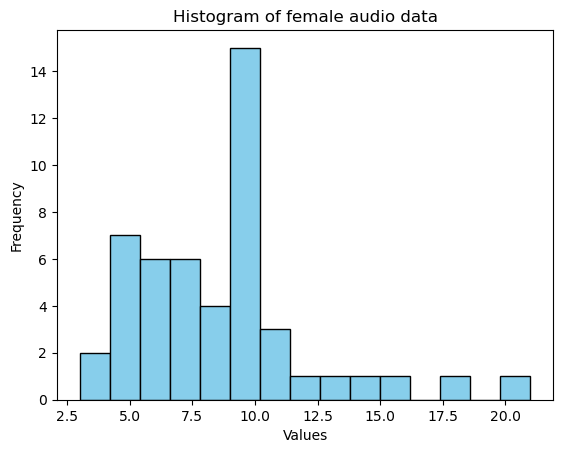

 female audio  Shapiro test :  ShapiroResult(statistic=0.8909658193588257, pvalue=0.00028221061802469194)


In [51]:
#check normality assumptions for each female audio

# Plot the histogram
plt.hist(data_female_audio, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of female audio data')

plt.show()

print(" female audio  Shapiro test : ", stats.shapiro(data_female_audio))
#NOT NORMAL

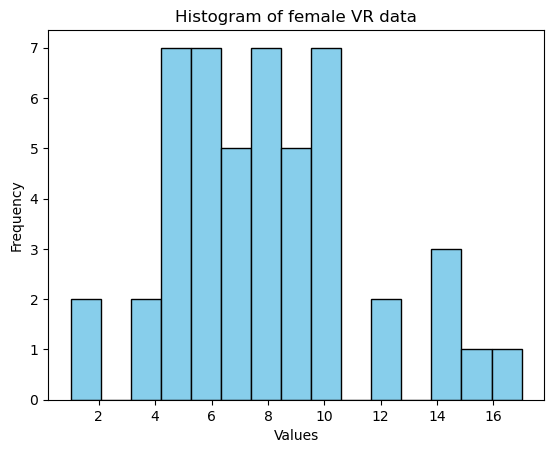

 female VR  Shapiro test :  ShapiroResult(statistic=0.9573293328285217, pvalue=0.07355478405952454)


In [50]:
#check normality assumptions for female VR

# Plot the histogram
plt.hist(data_female_VR, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of female VR data')

plt.show()

print(" female VR  Shapiro test : ", stats.shapiro(data_female_VR))
# NORMAL


In [33]:
#variance test for male/female audio and male/female VR
stats.levene(data_female_VR, data_female_audio, data_male_audio, data_male_VR)

LeveneResult(statistic=0.7055168612516912, pvalue=0.5498047144264055)

In [ ]:
#non-parametric test kruskal wallis on the four conditions
stats.kruskal(data_female_audio, data_male_audio, data_female_VR, data_male_VR)

<h1>Post-hoc analysis

In [34]:
#sort the dataframe on gender, in order to split the data into two groups based on gender
sorted_df = data.sort_values(by='gender')
sorted_df = sorted_df.reset_index(drop=True)
female_pp_df = sorted_df[0:35]
male_pp_df = sorted_df[35:]


In [ ]:
#reset index
female_pp_df.reset_index(drop=True, inplace=True)
female_pp_df.index += 1
#print df to check
female_pp_df

#reset index
male_pp_df.reset_index(drop=True, inplace=True)
male_pp_df.index += 36
#print df to check
male_pp_df

In [41]:
#calculate means and stds for the male participants
mean_w1 = (male_pp_df["w1_count"].mean())
mean_w2 = (male_pp_df["w2_count"].mean())
mean_w3= (male_pp_df["w3_count"].mean())
mean_w4= (male_pp_df["w4_count"].mean())


print("the mean of recalled words in wordlist 1 for male participants is : ", mean_w1, "and the std is : ", male_pp_df["w1_count"]. std())
print("the mean of recalled words in wordlist 2 for male participants is : ", mean_w2, "and the std is : ", male_pp_df["w2_count"]. std())
print("the mean of recalled words in wordlist 3 for male participants is : ", mean_w3, "and the std is : ", male_pp_df["w3_count"]. std())
print("the mean of recalled words in wordlist 4 for male participants is : ", mean_w4, "and the std is : ", male_pp_df["w4_count"]. std())

the mean of recalled words in wordlist 1 for male participants is :  7.714285714285714 and the std is :  3.3610568719828735
the mean of recalled words in wordlist 2 for male participants is :  8.357142857142858 and the std is :  3.248837492849567
the mean of recalled words in wordlist 3 for male participants is :  8.357142857142858 and the std is :  3.4105524672504504
the mean of recalled words in wordlist 4 for male participants is :  7.857142857142857 and the std is :  3.1830595551871363


In [42]:
#calculate means and stds for the female participants
mean_w5 = (female_pp_df["w1_count"].mean())
mean_w6= (female_pp_df["w2_count"].mean())
mean_w7= (female_pp_df["w3_count"].mean())
mean_w8= (female_pp_df["w4_count"].mean())


print("the mean of recalled words in wordlist 1 for female participants is : ", mean_w5, "and the std is : ", female_pp_df["w1_count"].std())
print("the mean of recalled words in wordlist 2 for female participants is : ", mean_w6, "and the std is : ", female_pp_df["w2_count"].std())
print("the mean of recalled words in wordlist 3 for female participants is : ", mean_w7, "and the std is : ", female_pp_df["w3_count"].std())
print("the mean of recalled words in wordlist 4 for female participants is : ", mean_w8, "and the std is : ", female_pp_df["w4_count"].std())

the mean of recalled words in wordlist 1 for female participants is :  7.828571428571428 and the std is :  2.2943115625865826
the mean of recalled words in wordlist 2 for female participants is :  8.028571428571428 and the std is :  3.1388056391462236
the mean of recalled words in wordlist 3 for female participants is :  8.657142857142857 and the std is :  3.580526227697109
the mean of recalled words in wordlist 4 for female participants is :  8.057142857142857 and the std is :  3.360172064421852


In [43]:
#concat the data together, so the gender of the participants is seperated, and the voice of the stimuli is seperated
f_data_f = pd.concat([(female_pp_df["w3_count"]),(female_pp_df["w4_count"])], axis = 0 )   #female participants listening to female voice
f_data_m = pd.concat([(female_pp_df["w1_count"]),(female_pp_df["w2_count"])], axis = 0 )    #female participants listening to male voice
m_data_m= pd.concat([(male_pp_df["w1_count"]),(female_pp_df["w2_count"])], axis = 0 )     #male participants listening to male voice
m_data_f = pd.concat([(male_pp_df["w3_count"]),(female_pp_df["w4_count"])], axis = 0 )    #male participants listening to female voice

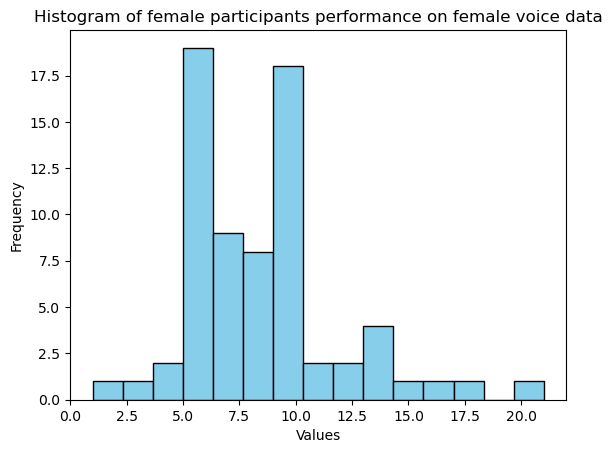

 Shapiro test :  ShapiroResult(statistic=0.9294477105140686, pvalue=0.00070306530687958)


In [49]:
#check normality assumption for females listening to a female voice 
# Plot the histogram
plt.hist(f_data_f, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of female participants listening to a female voice data')


plt.show()

print(" Shapiro test : ", stats.shapiro(f_data_f))
# not NORMAL

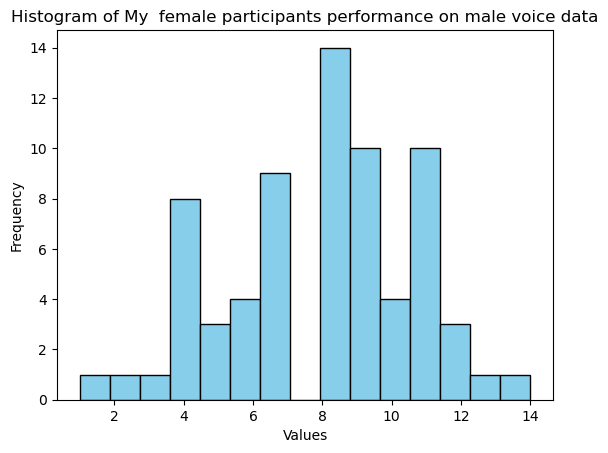

 Shapiro test :  ShapiroResult(statistic=0.971986711025238, pvalue=0.11805903166532516)


In [48]:
#check normality assumption on female participants listening to a male voice
# Plot the histogram
plt.hist(f_data_m, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of My  female participants listening to a male voice data')

plt.show()

print(" Shapiro test : ", stats.shapiro(f_data_m))
#  NORMAL

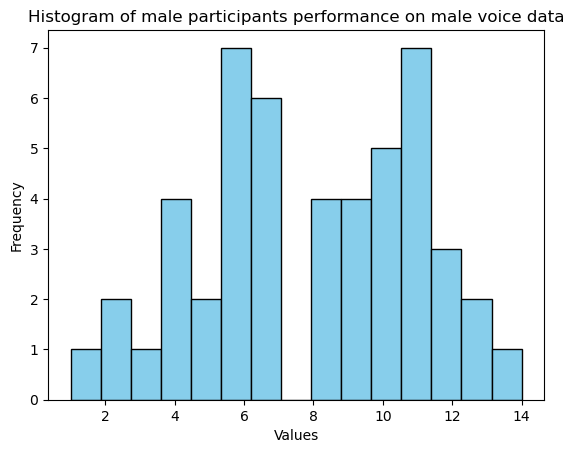

 Shapiro test :  ShapiroResult(statistic=0.9733582735061646, pvalue=0.32762786746025085)


In [58]:
#check normality assumption on male particpants listening to a male voice 
# Plot the histogram
plt.hist(m_data_m, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of male participants listening to male voice data')

plt.show()

print(" Shapiro test : ", stats.shapiro(m_data_m))
#NORMAL

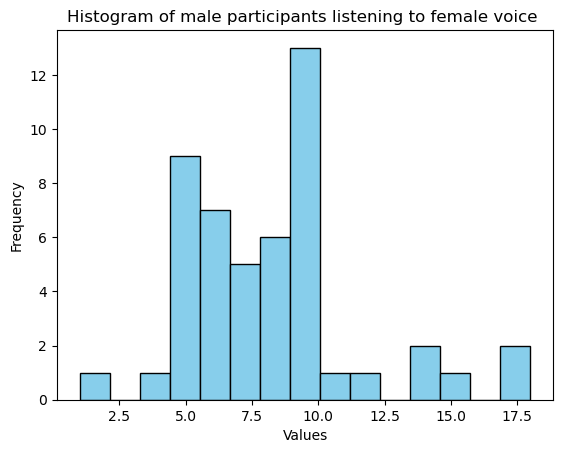

 Shapiro test :  ShapiroResult(statistic=0.9164767265319824, pvalue=0.001985764829441905)


In [59]:
#check normality assumption on male participants listening to a female voice
# Plot the histogram
plt.hist(m_data_f, bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of male participants listening to female voice ')

# Show the plot
plt.show()

print(" Shapiro test : ", stats.shapiro(m_data_f))
# not NORMAL

In [ ]:
#check homogenity in variance assumption
stats.levene(f_data_f , m_data_f, f_data_m, m_data_m)

In [ ]:
#both normally distributed AND homogenity
stats.ttest_ind(f_data_m, m_data_m, equal_var = True )

In [ ]:
#assumptions are violated, therefore mann whityney in place of independent t-test 
stats.mannwhitneyu(f_data_f, m_data_f)

In [ ]:
#as an alternative for ANOVA, all four variables are considered
stats.kruskal(f_data_m, m_data_m, f_data_f, m_data_f)

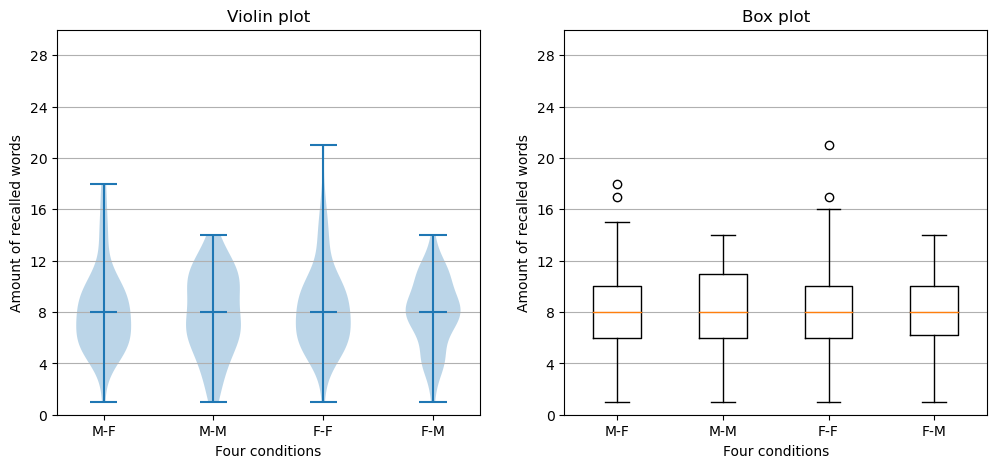

In [65]:
#visualisation of distribution of females listening to a male/female voice and males listening to a male/female voice


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

all_data = [m_data_f, m_data_m, f_data_f, f_data_m]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines and lables
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['M-F', 'M-M', 'F-F', 'F-M'])
    ax.set_xlabel('Four conditions')
    ax.set_ylabel('Amount of recalled words')
    ax.set_ylim(0,30)
    ax.set_yticks(np.arange(0,30,4))

plt.show()

{'Strongly disagree': 0, 'Somewhat disagree': 1, 'Neither agree nor disagree': 7, 'Somewhat agree': 4, 'Strongly agree': 2}


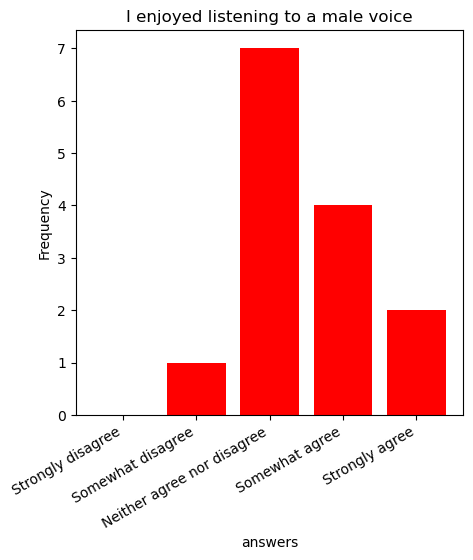

In [73]:
#visualisation of a question from the survey about preference in gender

#do male participants enjoy listening to a male voice 

#create dictionary and create keys, which were the possible answers from the survey
answers_male = ["Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"]
dct_male = {}

for i in answers_male:
    dct_male[i] = 0 

#loop through the answers of the male participants, and keep track of the count in the dictionary
for answer in male_pp_df["q4_4"]:
    dct_male[answer] += 1 
print(dct_male)

#create a list of all answer values and keys in order to plot it in a barplot
ans2_m = list(dct_male.keys())
other2_m = list(dct_male.values())

# Create a bar plot and add labels
plt.figure(figsize=(5, 5))
plt.bar(ans2_m, other2_m, color='red', width=0.8)
plt.title("I enjoyed listening to a male voice")
plt.xlabel('answers')
plt.ylabel('Frequency')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.show()



{'Strongly disagree': 0, 'Somewhat disagree': 1, 'Neither agree nor disagree': 8, 'Somewhat agree': 3, 'Strongly agree': 2}


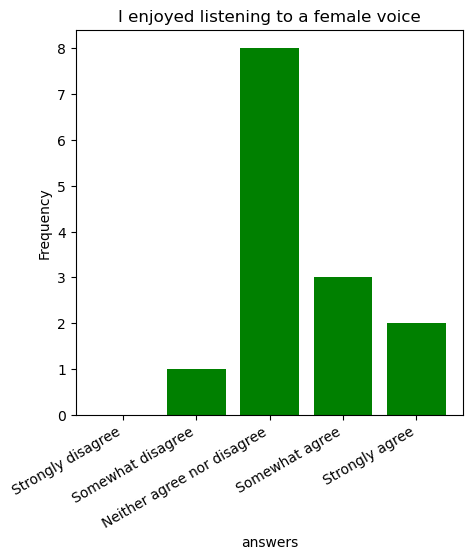

In [70]:
#visualisation of a question from the survey about preference in gender

#do male participants enjoy listening to a female voice 

#create dictionary and create keys, which were the possible answers from the survey
answers_male = ["Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"]
dct_male = {}

for i in answers_male:
    dct_male[i] = 0 

#loop through the answers of the male participants, and keep track of the count in the dictionary
for answer in male_pp_df["q4_3"]:
    dct_male[answer] += 1 
print(dct_male)

#create a list of all answer values and keys in order to plot it in a barplot
ans2_m = list(dct_male.keys())
other2_m = list(dct_male.values())

# Create a bar plot and add labels
plt.figure(figsize=(5, 5))
plt.bar(ans2_m, other2_m, color='green', width=0.8)
plt.title("I enjoyed listening to a female voice")
plt.xlabel('answers')
plt.ylabel('Frequency')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.show()



{'Strongly disagree': 0, 'Somewhat disagree': 2, 'Neither agree nor disagree': 18, 'Somewhat agree': 12, 'Strongly agree': 3}


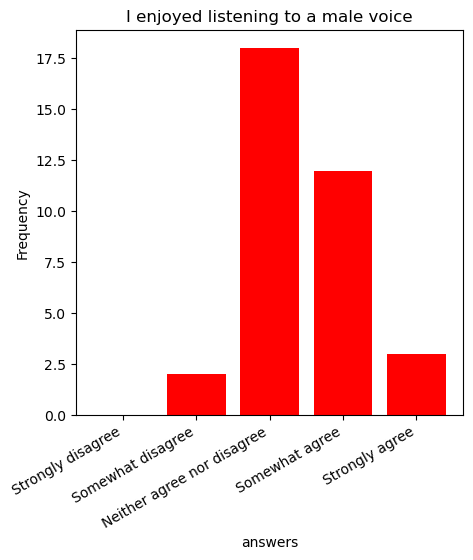

In [68]:
#visualisation of a question from the survey about preference in gender

#do female participants enjoy listening to a male voice 

#create dictionary and create keys, which were the possible answers from the survey
answers_female = ["Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"]
dct_female = {}

for i in answers_female:
    dct_female[i] = 0 

#loop through the answers of the female participants, and keep track of the count in the dictionary
for answer in female_pp_df["q4_4"]:
    dct_female[answer] += 1 
print(dct_female)

#create a list of all answer values and keys in order to plot it in a barplot
ans2_m = list(dct_female.keys())
other2_m = list(dct_female.values())

# Create a bar plot and add labels
plt.figure(figsize=(5, 5))
plt.bar(ans2_m, other2_m, color='red', width=0.8)
plt.title("I enjoyed listening to a male voice")
plt.xlabel('answers')
plt.ylabel('Frequency')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.show()



{'Strongly disagree': 0, 'Somewhat disagree': 2, 'Neither agree nor disagree': 16, 'Somewhat agree': 14, 'Strongly agree': 3}


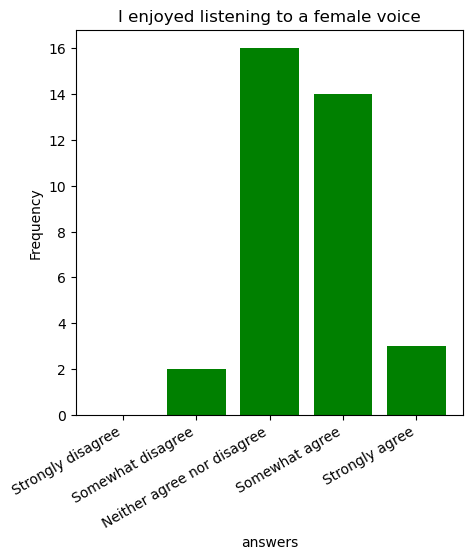

In [69]:
#visualisation of a question from the survey about preference in gender

#do female participants enjoy listening to a female voice 

#create dictionary and create keys, which were the possible answers from the survey
answers_female = ["Strongly disagree", "Somewhat disagree", "Neither agree nor disagree", "Somewhat agree", "Strongly agree"]
dct_female = {}

for i in answers_female:
    dct_female[i] = 0 

#loop through the answers of the female participants, and keep track of the count in the dictionary
for answer in female_pp_df["q4_3"]:
    dct_female[answer] += 1 
print(dct_female)

#create a list of all answer values and keys in order to plot it in a barplot
ans2_m = list(dct_female.keys())
other2_m = list(dct_female.values())

# Create a bar plot and add labels
plt.figure(figsize=(5, 5))
plt.bar(ans2_m, other2_m, color='green', width=0.8)
plt.title("I enjoyed listening to a female voice")
plt.xlabel('answers')
plt.ylabel('Frequency')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.show()

